In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import keras
from keras import layers

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

In [4]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2745 - val_loss: 0.1851
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1674 - val_loss: 0.1511
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1422 - val_loss: 0.1324
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1277 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1185 - val_loss: 0.1133
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1117 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1065 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1026 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0997 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0977 - val_loss: 0.0956

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


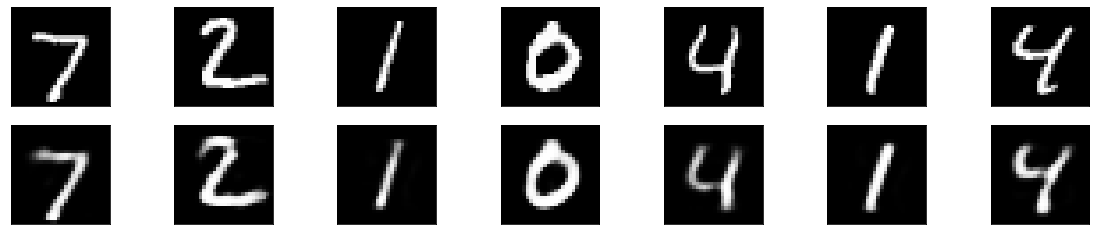

In [7]:
n = 7  
plt.figure(figsize=(20, 4))
for i in range(n):
    #original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()